In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [143]:
url = 'https://www.pro-football-reference.com/years/2019/passing.htm'

In [144]:
page=requests.get(url)

In [145]:
soup=BeautifulSoup(page.text)

In [146]:
soup

<!DOCTYPE html>
<html class="no-js" data-root="/home/pfr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202006251" rel="dns-prefetch"/>
<!-- no:cookie fast load the css.           -->
<script>function gup(n) {n = n.replace(/[\[]/, '\\[').replace(/[\]]/, '\\]'); var r = new RegExp('[\\?&]'+n+'=([^&#]*)'); var re = r.exec(location.search);   return re === null?'':decodeURIComponent(re[1].replace(/\+/g,' '));}; document.srdev = gup('srdev')</script>
<link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>
<style>html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;background:#c9cbcd;z-index:0;-webkit-text-size-adjust:none;

In [147]:
column_headers = soup.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [148]:
column_headers

['Rk',
 'Player',
 'Tm',
 'Age',
 'Pos',
 'G',
 'GS',
 'QBrec',
 'Cmp',
 'Att',
 'Cmp%',
 'Yds',
 'TD',
 'TD%',
 'Int',
 'Int%',
 '1D',
 'Lng',
 'Y/A',
 'AY/A',
 'Y/C',
 'Y/G',
 'Rate',
 'QBR',
 'Sk',
 'Yds',
 'NY/A',
 'ANY/A',
 'Sk%',
 '4QC',
 'GWD']

In [149]:
rows = soup.findAll('tr')[1:]

In [150]:
stats=[]
for i in range(len(rows)):
    stats.append([col.getText() for col in rows[i].findAll('td')])

In [151]:
stats[0]

['Jared Goff',
 'LAR',
 '25',
 'QB',
 '16',
 '16',
 '9-7-0',
 '394',
 '626',
 '62.9',
 '4638',
 '22',
 '3.5',
 '16',
 '2.6',
 '220',
 '66',
 '7.4',
 '7.0',
 '11.8',
 '289.9',
 '86.5',
 '',
 '22',
 '170',
 '6.90',
 '6.46',
 '3.4',
 '1',
 '2']

In [152]:
df=pd.DataFrame(stats,columns=column_headers[1:])

In [153]:
df.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Jared Goff,LAR,25,QB,16,16,9-7-0,394,626,62.9,...,289.9,86.5,,22,170,6.90,6.46,3.4,1,2
1,Jameis Winston,TAM,25,QB,16,16,7-9-0,380,626,60.7,...,319.3,84.3,,47,282,7.17,6.15,7.0,2,2
2,Matt Ryan,ATL,34,QB,15,15,7-8-0,408,616,66.2,...,297.7,92.1,,48,316,6.25,6.08,7.2,3,2
3,Tom Brady,NWE,42,QB,16,16,12-4-0,373,613,60.8,...,253.6,88.0,,27,185,6.05,6.24,4.2,1,1
4,Carson Wentz,PHI,27,QB,16,16,9-7-0,388,607,63.9,...,252.4,93.1,,37,230,5.91,6.26,5.7,2,4


In [154]:
df.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

### Two yds columns can be confusing

In [155]:
new_columns=df.columns.values
new_columns[-6]='Yds_Sack'
df.columns=new_columns

In [156]:
df.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [157]:
df_important=df[['Player','Tm','Cmp%','Yds','TD','Int','Y/A','Rate']]

In [158]:
df_important.head(30)

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638,22,16,7.4,86.5
1,Jameis Winston,TAM,60.7,5109,33,30,8.2,84.3
2,Matt Ryan,ATL,66.2,4466,26,14,7.3,92.1
3,Tom Brady,NWE,60.8,4057,24,8,6.6,88.0
4,Carson Wentz,PHI,63.9,4039,27,7,6.7,93.1
5,Dak Prescott,DAL,65.1,4902,30,11,8.2,99.7
6,Philip Rivers,LAC,66.0,4615,23,20,7.8,88.5
7,Aaron Rodgers *,GNB,62.0,4002,26,4,7.0,95.4
8,Kyler Murray,ARI,64.4,3722,20,12,6.9,87.4
9,Baker Mayfield,CLE,59.4,3827,22,21,7.2,78.8


In [159]:
df_important.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [160]:
df_important=df_important.astype({'Player':object,'Tm':object,'Cmp%':np.float64,'Yds':np.float64,'TD':np.float64,'Int':np.float64,'Y/A':np.float64,'Rate':np.float64})

In [161]:
df_important.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [162]:
df_important['Player'] = df_important['Player'].str.replace('*', '')
df_important['Player'] = df_important['Player'].str.replace('+', '')

In [163]:
df_important.shape

(105, 8)

### Too many players in this list. This includes punters and wide recievers who might've throwns 3 passes all season. So I'll use >500 yards as a filter.

In [164]:
df_important=df_important[df_important['Yds']>1500]

In [165]:
df_important.shape

(32, 8)

### 46 QBs is probably a better number than 105. This probably includes backups when the starter went down. 

In [166]:
df_important

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1
5,Dak Prescott,DAL,65.1,4902.0,30.0,11.0,8.2,99.7
6,Philip Rivers,LAC,66.0,4615.0,23.0,20.0,7.8,88.5
7,Aaron Rodgers,GNB,62.0,4002.0,26.0,4.0,7.0,95.4
8,Kyler Murray,ARI,64.4,3722.0,20.0,12.0,6.9,87.4
9,Baker Mayfield,CLE,59.4,3827.0,22.0,21.0,7.2,78.8


In [167]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 
               'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 
               'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 
               'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731', 
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 
               'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 
               'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#002244', 
               'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 
               'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 
               'TEN':'#0c2340', 'WAS':'#773141'}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyError: 29

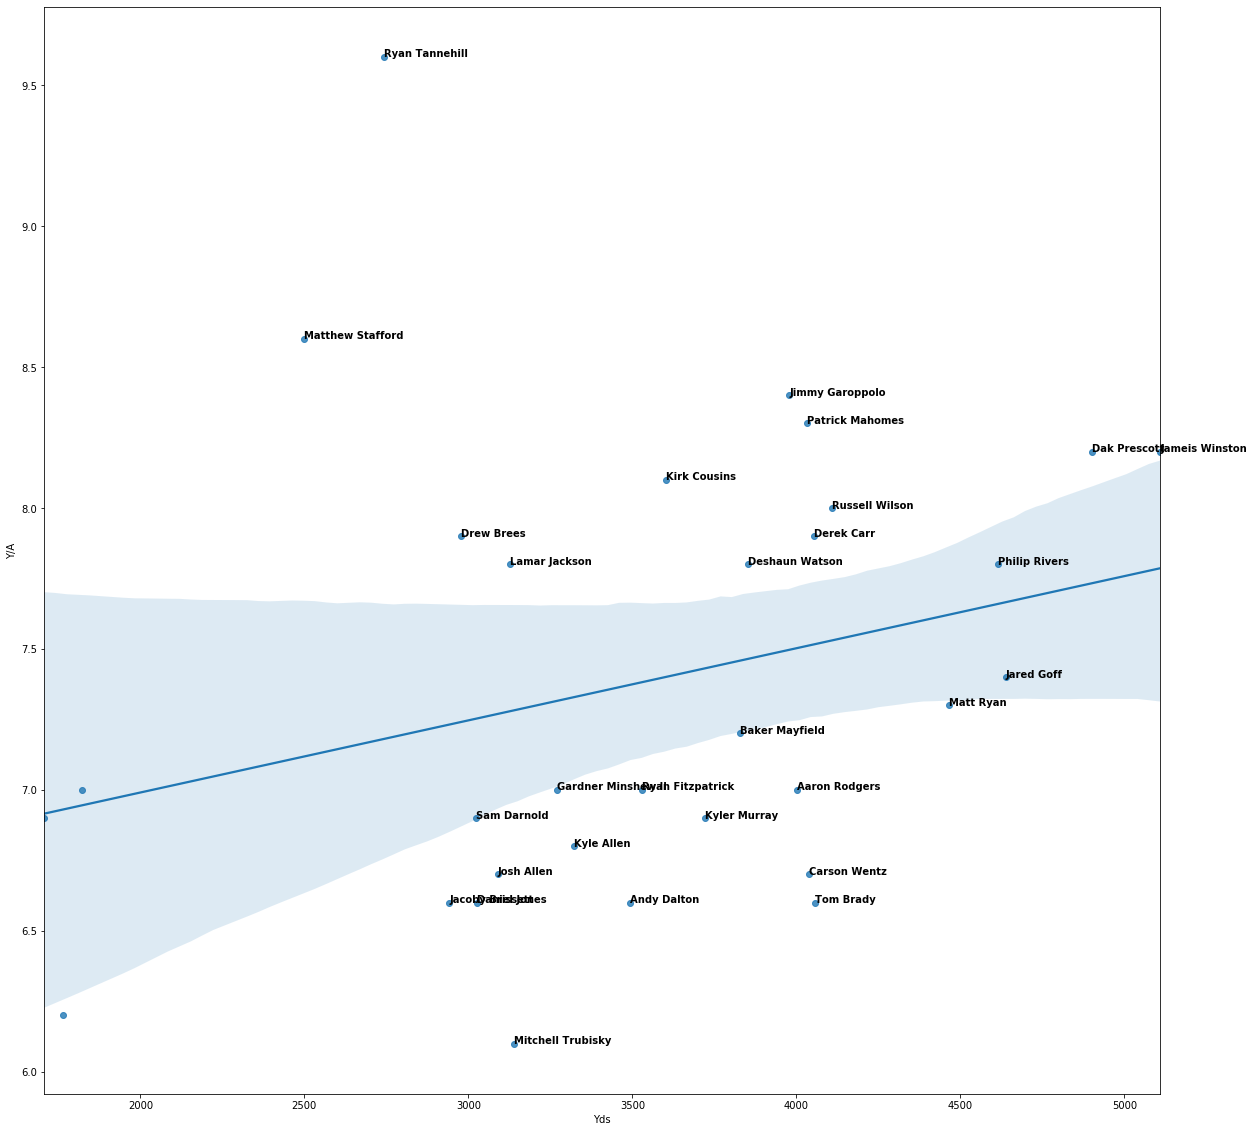

In [168]:
plt.figure(figsize=(20,20))
p1=sns.regplot(x="Yds", y="Y/A", data=df_important)
for line in range(0,len(df_important)):
    print(line)
    p1.text(df_important.Yds[line], df_important['Y/A'][line], df_important.Player[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


### Getting a key error since a 29 is missing in the index, so I'll have to reset the index.

### The reason I chose to use Y/A is sources like bleacher report believe it's a good indicator as it takes completion % and how often a qb throws downfield into account. The one down side is it doens't take into how many sacks a qb takes, but other than that it's a solid metric

In [172]:
df_important.reset_index(drop=True,inplace=True)

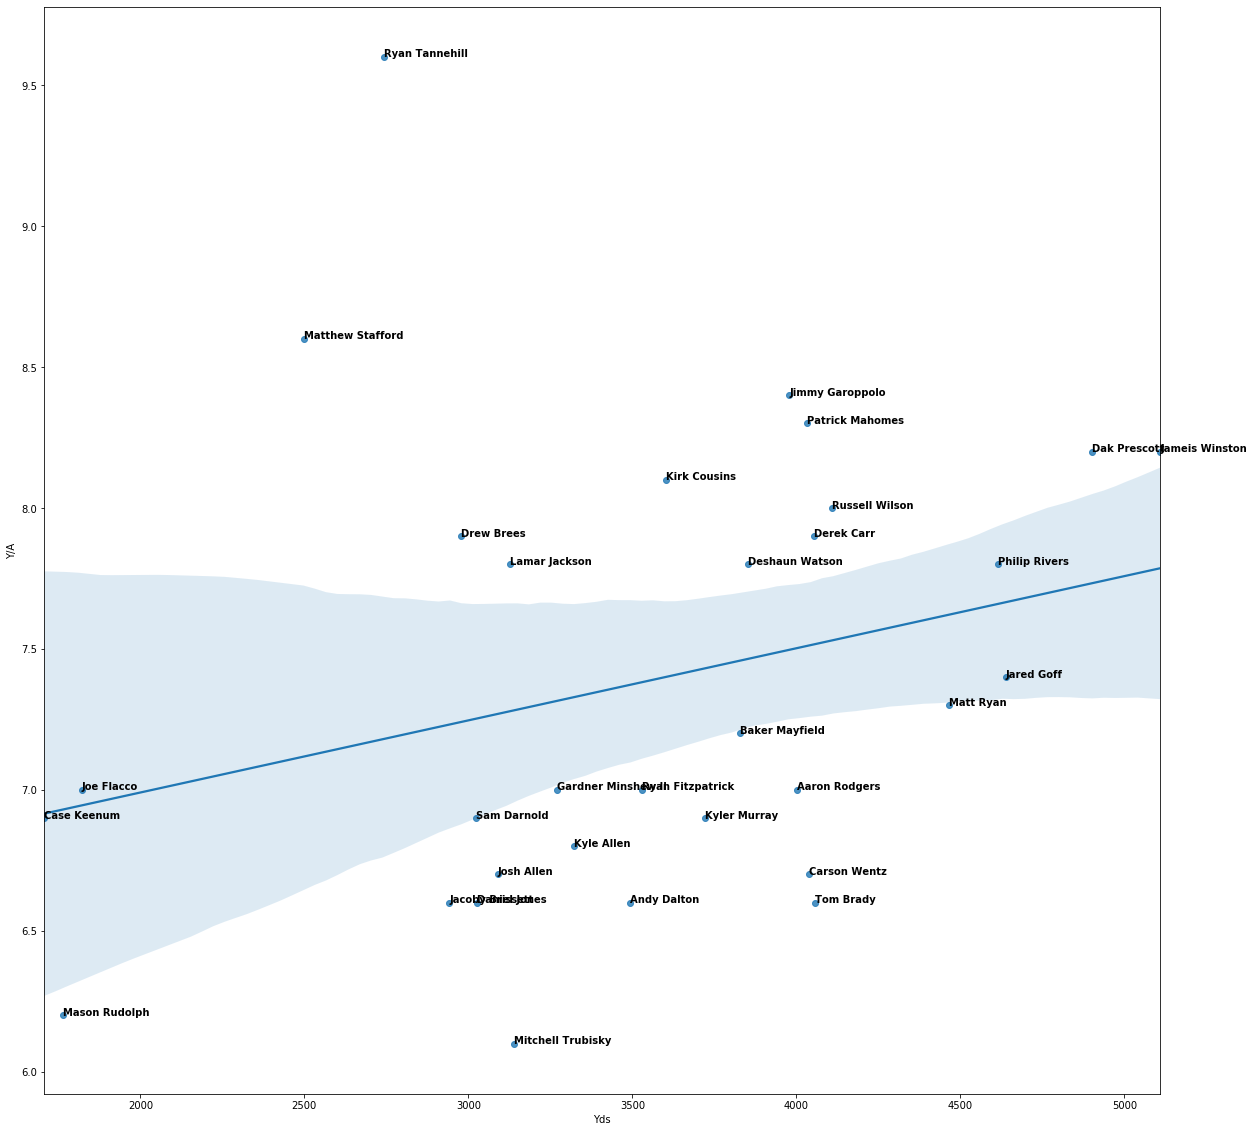

In [178]:
plt.figure(figsize=(20,20))
p1=sns.regplot(x="Yds", y="Y/A", data=df_important)
for line in range(0,len(df_important)):
    p1.text(df_important.Yds[line], df_important['Y/A'][line], df_important.Player[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


### This is much better. It's hard to tell but that's Jacoby Brisett and Daniel Jones mixed together in the bottom middle. Other than that we can see some interesting things here. Matthew stafford was having a phenominal year before getting hurt at over 8.5 Y/A, leading the NFL. Can also see Mason Rudolph and Mitchell Trubisky had awful years at the bottom of the pack with just over 6 Y/A. I also think it's shocking to look at the high caliber QBs like Wentz, Brady, and Rodgers, who all fall in the bottom half of the NFL of Y/A. Now all three QBs did have a poor supporting cast with Wentz's starting WRs all getting hurt, Rodgers main target got injured, and Brady only had one true good WR all year, and Edelman isn't a guy that will beat you over the top. So it does make sense that these three struggled in terms of Y/A. One thing that shocked me personally was Jimmy Grappalo. I thought he was a mediocre QB all season that won off the back of a dominant running attack and amazing defense, but he put up some great numbers, rivaling Patrick Mahomes. Now that's not to say they're at the same tier, as Mahomes is argubably the best QB in the NFL, but it was interesting to see. Looking at the second year QBS, (Allen, Darnold, Mayfield, Jackson) one thing that stood out to me was Josh Allen and Darnold. Often people were saying Allen was the second best QB last year out of the 4, behind the league MVP Jackson. But this chart shows Darnold had a better Y/A and was just behind in yards, which doesn't show that Darnold was out for 4 games. This also doesn't show Allens rushing yards which is definetly above Darnold's, but still I think Darnold was the better QB, especially with what he had to work with in the Jets organization. Not to leave out Baker, who here you would say had the second best season in this graph, but when we look at INTs you'll see why this doesn't hold up. Also he has a star studded offense and was average at best this season. Was really disappointing considering how great his freshman season was.

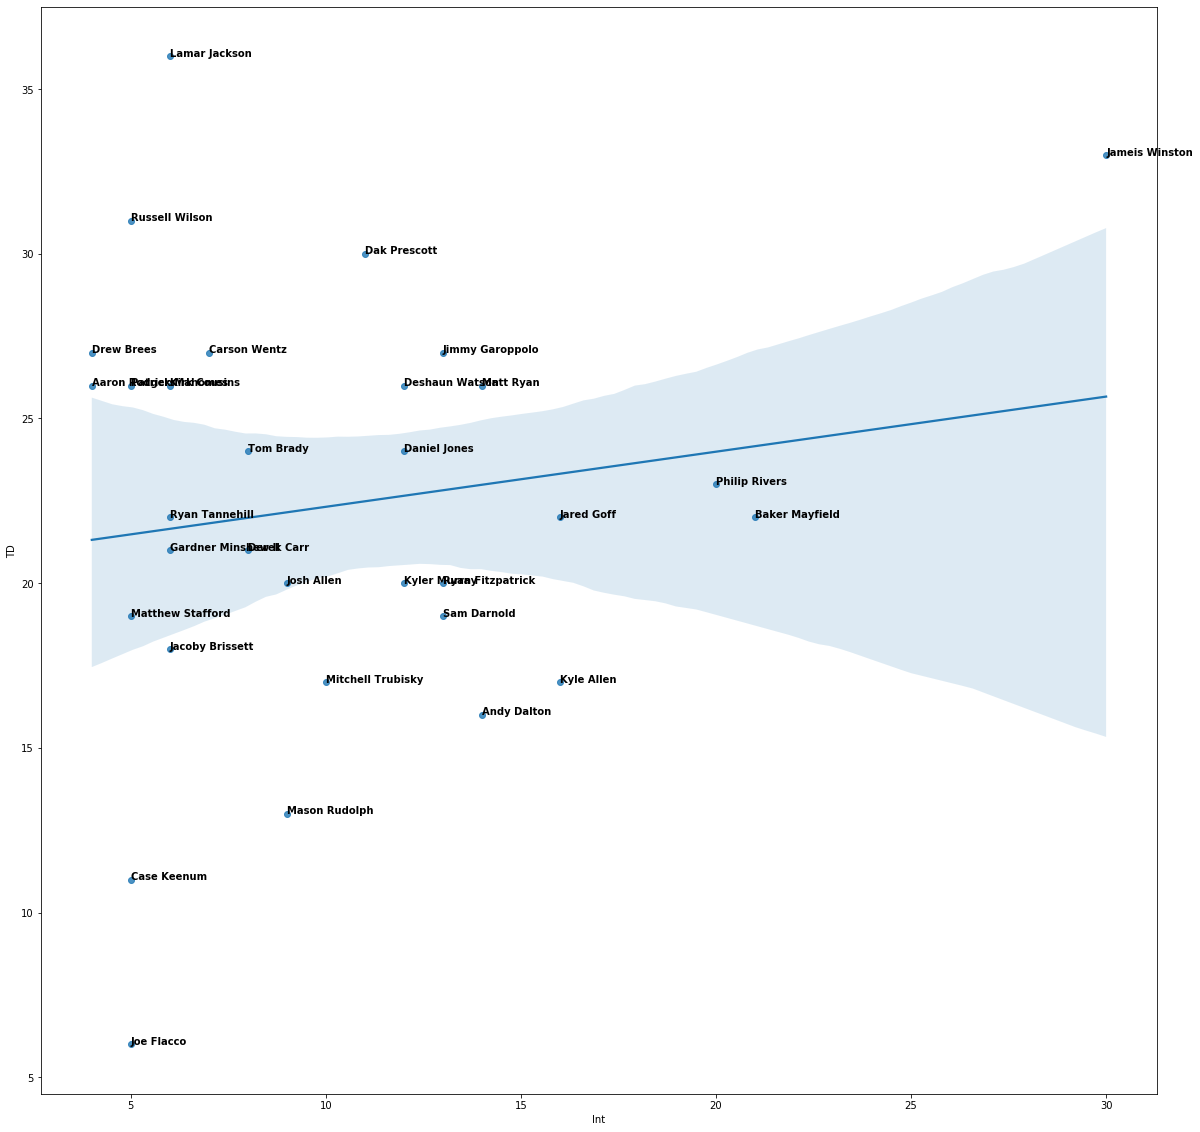

In [184]:
plt.figure(figsize=(20,20))
p1=sns.regplot(x="Int", y="TD", data=df_important)
for line in range(0,len(df_important)):
    p1.text(df_important.Int[line], df_important.TD[line], df_important.Player[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


### I mainly wanted to use this as a supplement graph to the one before. This shows why Jameis lost his starting position after last year and why Philip Rivers wasn't resigned. Both threw a lot of interceptions that hurt the team. This is also why I said Baker's season looked better than it actually was. He threw a lot of picks last year that cost his team, a team that was thought to be one of the best rosters in the NFL. I think this really makes certian QBs stand out as well. Look at Lamar Jackson in the top left, he was dominant all year, and neither of the past two graphs accounted for his rushing yards which broke an NFL record last year. Another crazy fact about Jackson is that he sat out over a whole 2 games worth of time due to sitting in fourth quarters and sitting out the last week.  Also Rusell Wilson, who was also in the MVP conversation had a greart year in terms of TD/INT ratio. Dak Prescott shocked me here and honestly has made me think he's definelty a top 10 QB and deserves that extension he wants. The three dots hard to see from left to right are Aaron Rodgers, Patrick Mahomes, and Krik Cousins. Patrick Mahomes would likely be closer to Wilson if it wasn't for him missing two weeks in the season. 

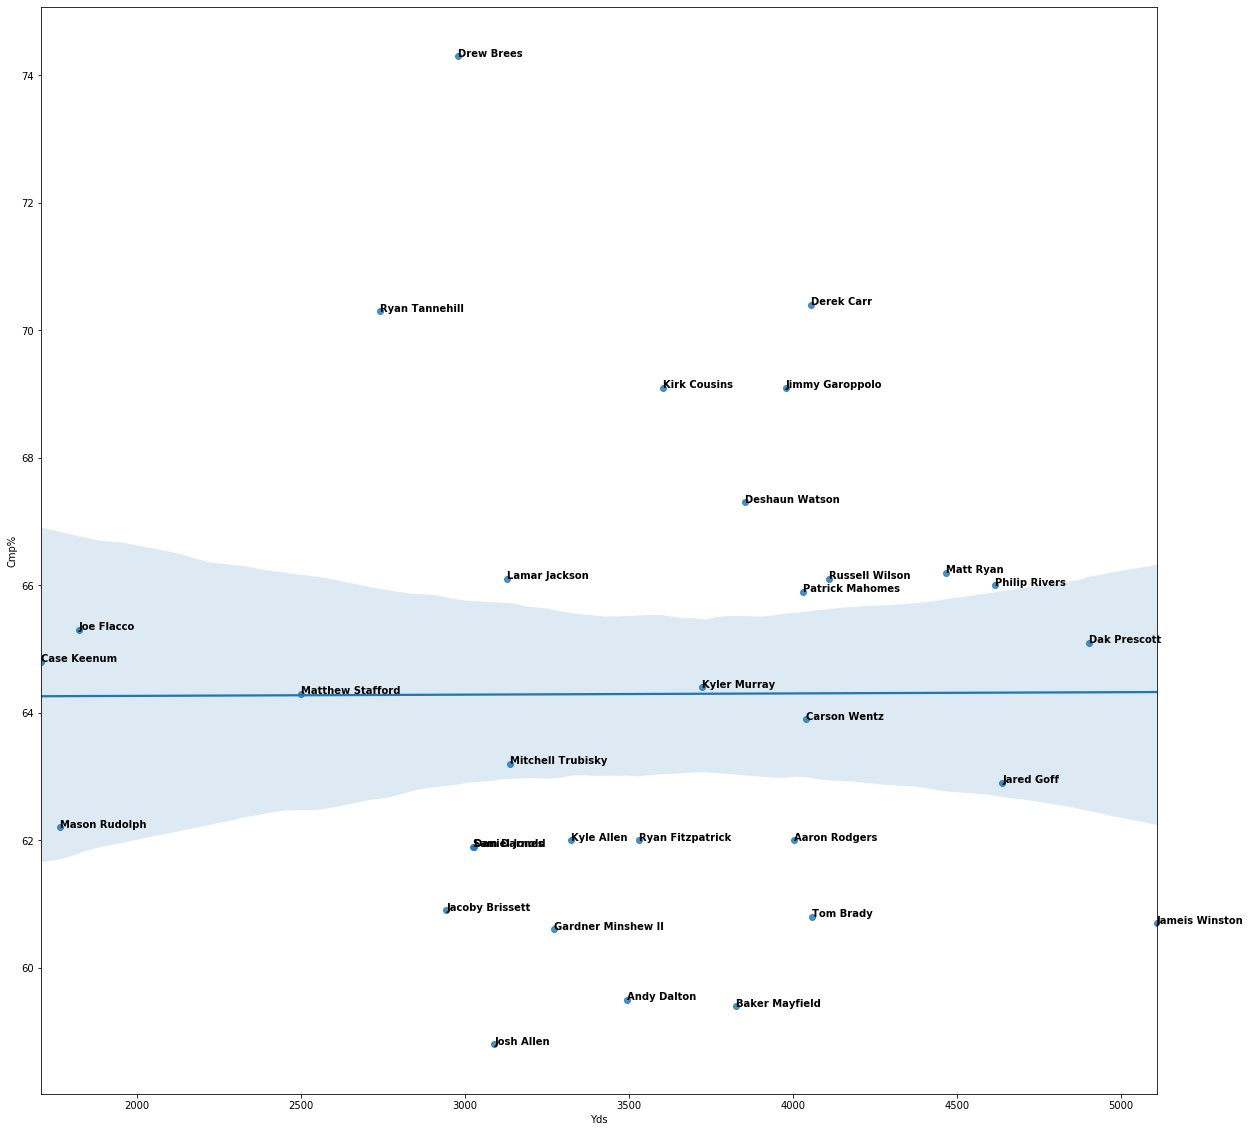

In [185]:
plt.figure(figsize=(20,20))
p1=sns.regplot(x="Yds", y="Cmp%", data=df_important)
for line in range(0,len(df_important)):
    p1.text(df_important.Yds[line], df_important['Cmp%'][line], df_important.Player[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


### Some interesting things here. First of all Josh Allen and Baker really need to improve their cmp% if they're going to make a leap in year three. I have to imagine after a year of low cmp% and high interceptions this is a make or break year for Baker. Josh Allen at least scrambles a good bit so if the pocket is collapsing he can make a play with his legs. Also after looking at these three graphs Aaron Rodgers had such a mediocre season. I'm starting to get behind the sentiment that his glory years are over and he's no longer elite. Ryan Tannehill really had a break out year which can be seen in this graph and the first graph, which is probably why he got such a nice contract, but it'll be interesting to see if he can keep up the performance this coming year. Drew Brees had a crazy good year in terms of Cmp%, no wonder the Saints offense is so hard to stop.

### I think between the three graphs you can get a good idea of who had a really good year, Jackson, Wilson, Tannehill, Brees, etc., and who had a bad year, Mayfield, Rudolph, Winston, Trubisky. I think TD% would be another good indicator, but I'll explore that another time. This gave a fun exploration into some Beautiful Soup and some seaborn. 